## 1. Cel laboratoriów

Celem laboratorium jest wyznaczenie współczynników regresji wieloliniowej dla modelu:
$$y = a \cdot x_1 + b \cdot x_2$$

Do obliczeń zostanie wykorzystana macierz pseudoodwrotna Moore-Penrose'a. Metoda ta pozwala na rozwiązanie układu równań nawet w przypadku macierzy osobliwych.

Zakres prac:
- wczytanie i analiza danych
- obliczenie macierzy pseudoodwrotnej
- wyznaczenie współczynników regresji
- weryfikacja wyników
- ocena jakości modelu
- wizualizacja wyników

## 2. Import bibliotek

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Ustawienia wizualizacji
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

## 3. Wczytanie danych

In [35]:
# wczytanie danych z CSV
data = pd.read_csv('war11.csv', sep=';', decimal=',')

print("Pierwsze 10 wierszy:")
print(data.head(10))

print(f"\nRozmiar: {data.shape}")
print(f"Ilość danych: {len(data)}")

Pierwsze 10 wierszy:
   x1  x2           y
0   1   2   11.118438
1   3   6  147.347351
2   5  10  300.234648
3   7  14   36.586305
4   9  18  469.589887
5  11  22  203.804043
6  13  26  292.624018
7  15  30  132.112900
8  17  34  872.373111
9  19  38  292.561121

Rozmiar: (110, 3)
Ilość danych: 110


## 4. Analiza statystyczna danych

In [36]:
print("Statystyki:")
print(data.describe())

print("\nKorelacje:")
correlation_matrix = data.corr()
print(correlation_matrix)

Statystyki:
               x1          x2             y
count  110.000000  110.000000    110.000000
mean   110.000000  220.000000   4380.512235
std     63.796552  127.593103   3490.936075
min      1.000000    2.000000     11.118438
25%     55.500000  111.000000   1582.956997
50%    110.000000  220.000000   3622.411789
75%    164.500000  329.000000   6776.478255
max    219.000000  438.000000  14761.511740

Korelacje:
          x1        x2         y
x1  1.000000  1.000000  0.724625
x2  1.000000  1.000000  0.724625
y   0.724625  0.724625  1.000000


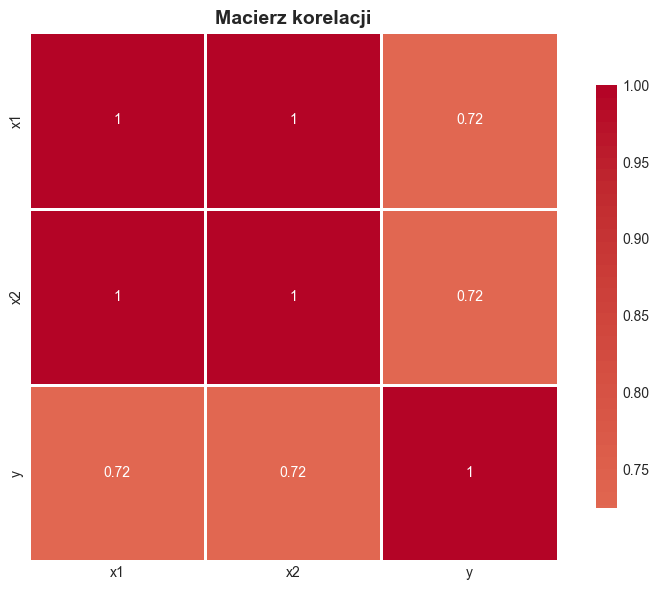

In [37]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Macierz korelacji', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 5. Przygotowanie macierzy do regresji

In [38]:
x1 = data['x1'].values
x2 = data['x2'].values
y = data['y'].values

# macierz X bez wyrazu wolnego
X = np.column_stack([x1, x2])

print(f"X: {X.shape}")
print(f"y: {y.shape}")
print(f"\nX (pierwsze 5):")
print(X[:5])

X: (110, 2)
y: (110,)

X (pierwsze 5):
[[ 1  2]
 [ 3  6]
 [ 5 10]
 [ 7 14]
 [ 9 18]]


## 6. Obliczenie współczynników regresji metodą macierzy pseudoodwrotnej

In [39]:
# obliczam X+
X_pinv = np.linalg.pinv(X)

print(f"X+ wymiary: {X_pinv.shape}")
print(f"\nX+:")
print(X_pinv)

X+ wymiary: (2, 110)

X+:
[[1.12699549e-07 3.38098646e-07 5.63497743e-07 7.88896840e-07
  1.01429594e-06 1.23969504e-06 1.46509413e-06 1.69049323e-06
  1.91589233e-06 2.14129142e-06 2.36669052e-06 2.59208962e-06
  2.81748872e-06 3.04288781e-06 3.26828691e-06 3.49368601e-06
  3.71908511e-06 3.94448420e-06 4.16988330e-06 4.39528240e-06
  4.62068149e-06 4.84608059e-06 5.07147969e-06 5.29687879e-06
  5.52227788e-06 5.74767698e-06 5.97307608e-06 6.19847518e-06
  6.42387427e-06 6.64927337e-06 6.87467247e-06 7.10007156e-06
  7.32547066e-06 7.55086976e-06 7.77626886e-06 8.00166795e-06
  8.22706705e-06 8.45246615e-06 8.67786525e-06 8.90326434e-06
  9.12866344e-06 9.35406254e-06 9.57946163e-06 9.80486073e-06
  1.00302598e-05 1.02556589e-05 1.04810580e-05 1.07064571e-05
  1.09318562e-05 1.11572553e-05 1.13826544e-05 1.16080535e-05
  1.18334526e-05 1.20588517e-05 1.22842508e-05 1.25096499e-05
  1.27350490e-05 1.29604481e-05 1.31858472e-05 1.34112463e-05
  1.36366454e-05 1.38620445e-05 1.40874436e-

In [40]:
# β = X+ * Y
beta = X_pinv @ y
a, b = beta

print("="*60)
print("WYNIKI")
print("="*60)
print(f"\na (x1): {a:.10f}")
print(f"b (x2): {b:.10f}")
print(f"\nmodel: y = {a:.6f} * x1 + {b:.6f} * x2")
print("="*60)

WYNIKI

a (x1): 7.9559947278
b (x2): 15.9119894555

model: y = 7.955995 * x1 + 15.911989 * x2


## 7. Weryfikacja rozwiązania metodą alternatywną

In [41]:
# sprawdzam wynik inną metodą: β = (X^T * X)^(-1) * X^T * Y
# x1 i x2 są skorelowane więc trzeba użyć pinv zamiast inv

XtX = X.T @ X
XtY = X.T @ y
XtX_pinv = np.linalg.pinv(XtX)
beta_alt = XtX_pinv @ XtY

print("Weryfikacja:")
print(f"a: {beta_alt[0]:.10f}")
print(f"b: {beta_alt[1]:.10f}")
print(f"\nRóżnica:")
print(f"Δa = {abs(a - beta_alt[0]):.2e}")
print(f"Δb = {abs(b - beta_alt[1]):.2e}")
print(f"\nkorelacja x1-x2: {np.corrcoef(x1, x2)[0,1]:.4f}")
print(f"macierz X^T*X jest osobliwa, dlatego pseudoinwersja")

Weryfikacja:
a: 7.9559947278
b: 15.9119894555

Różnica:
Δa = 5.33e-15
Δb = 8.88e-15

korelacja x1-x2: 1.0000
macierz X^T*X jest osobliwa, dlatego pseudoinwersja


## 8. Ocena jakości modelu

In [42]:
y_pred = X @ beta
residuals = y - y_pred

mse = np.mean(residuals**2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(residuals))

# R^2
ss_total = np.sum((y - np.mean(y))**2)
ss_residual = np.sum(residuals**2)
r2 = 1 - (ss_residual / ss_total)

n = len(y)
p = X.shape[1]
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("="*60)
print("JAKOŚĆ MODELU")
print("="*60)
print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"R²:   {r2:.6f}")
print(f"R² adj: {r2_adj:.6f}")
print("="*60)

JAKOŚĆ MODELU
MSE:  5735128.3324
RMSE: 2394.8128
MAE:  1783.3728
R²:   0.525074
R² adj: 0.516197


## 9. Wizualizacje

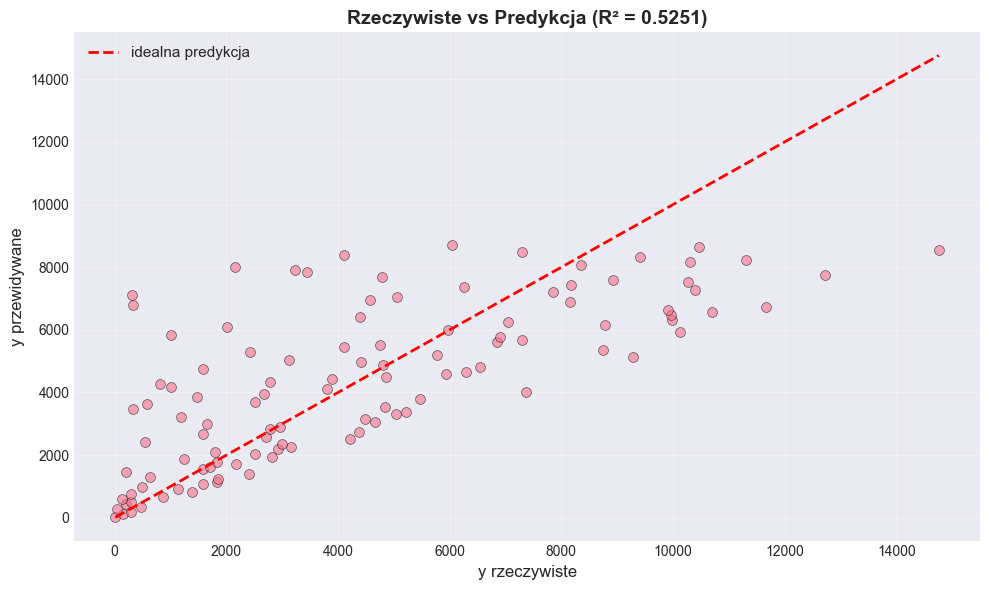

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.6, s=50, edgecolors='k', linewidth=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='idealna predykcja')
plt.xlabel('y rzeczywiste', fontsize=12)
plt.ylabel('y przewidywane', fontsize=12)
plt.title(f'Rzeczywiste vs Predykcja (R² = {r2:.4f})', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

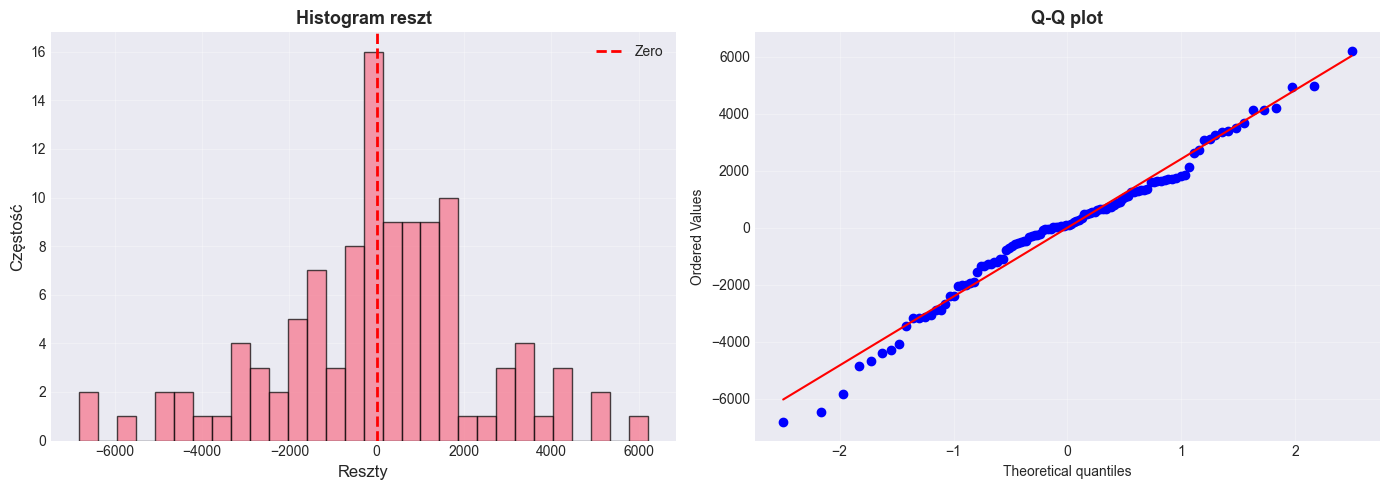

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(residuals, bins=30, edgecolor='black', alpha=0.7)
axes[0].axvline(0, color='red', linestyle='--', linewidth=2, label='Zero')
axes[0].set_xlabel('Reszty', fontsize=12)
axes[0].set_ylabel('Częstość', fontsize=12)
axes[0].set_title('Histogram reszt', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

from scipy import stats
stats.probplot(residuals, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q plot', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

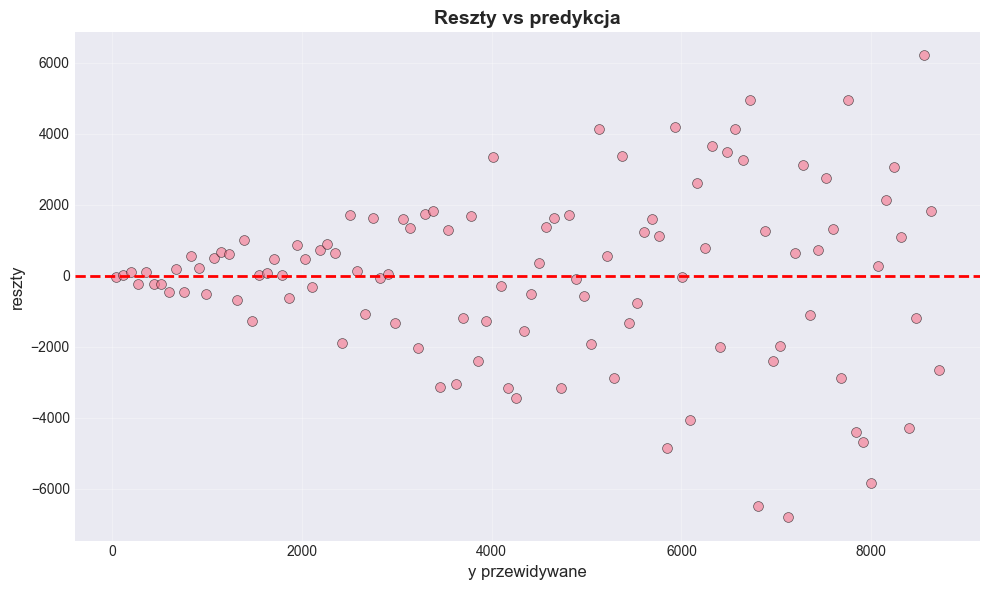

In [45]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6, s=50, edgecolors='k', linewidth=0.5)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('y przewidywane', fontsize=12)
plt.ylabel('reszty', fontsize=12)
plt.title('Reszty vs predykcja', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

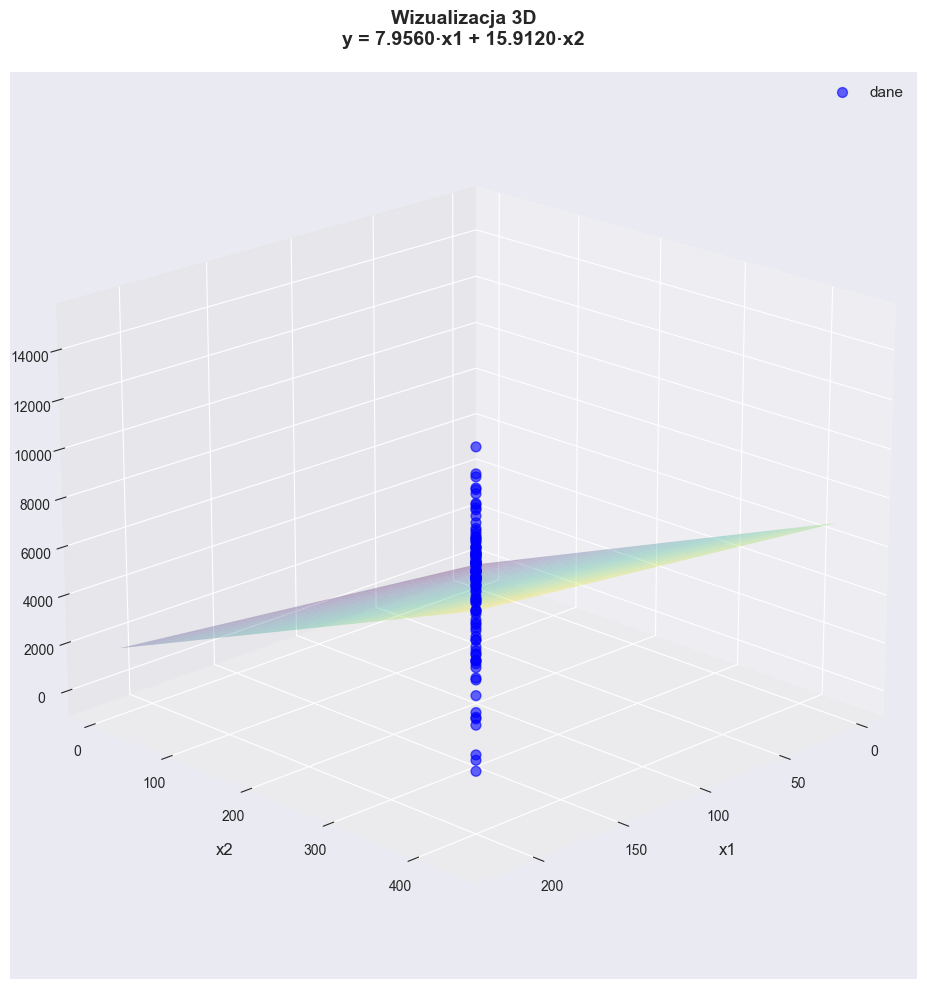

In [46]:
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, x2, y, c='blue', marker='o', s=50, alpha=0.6, label='dane')

# płaszczyzna
x1_range = np.linspace(x1.min(), x1.max(), 20)
x2_range = np.linspace(x2.min(), x2.max(), 20)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
y_grid = a * x1_grid + b * x2_grid

ax.plot_surface(x1_grid, x2_grid, y_grid, alpha=0.3, cmap='viridis', 
                linewidth=0, antialiased=True)

ax.set_xlabel('x1', fontsize=12, labelpad=10)
ax.set_ylabel('x2', fontsize=12, labelpad=10)
ax.set_zlabel('y', fontsize=12, labelpad=10)
ax.set_title(f'Wizualizacja 3D\ny = {a:.4f}·x1 + {b:.4f}·x2', 
             fontsize=14, fontweight='bold', pad=20)
ax.legend(fontsize=11)
ax.view_init(elev=20, azim=45)
plt.tight_layout()
plt.show()

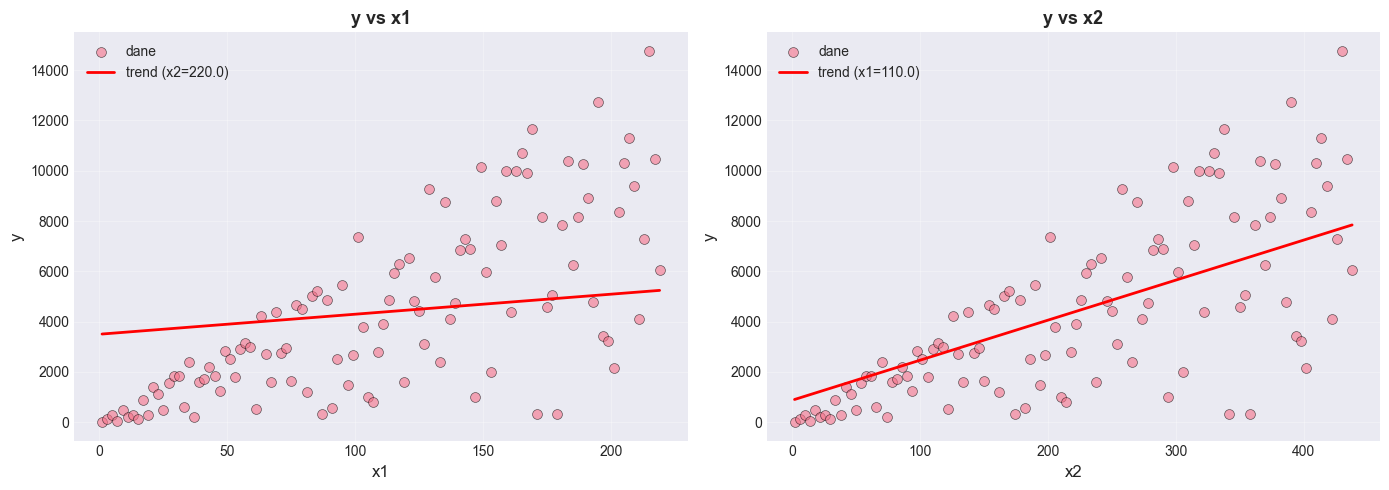

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(x1, y, alpha=0.6, s=50, edgecolors='k', linewidth=0.5, label='dane')
x1_line = np.array([x1.min(), x1.max()])
y_line_x1 = a * x1_line + b * np.mean(x2)
axes[0].plot(x1_line, y_line_x1, 'r-', linewidth=2, label=f'trend (x2={np.mean(x2):.1f})')
axes[0].set_xlabel('x1', fontsize=12)
axes[0].set_ylabel('y', fontsize=12)
axes[0].set_title('y vs x1', fontsize=13, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

axes[1].scatter(x2, y, alpha=0.6, s=50, edgecolors='k', linewidth=0.5, label='dane')
x2_line = np.array([x2.min(), x2.max()])
y_line_x2 = a * np.mean(x1) + b * x2_line
axes[1].plot(x2_line, y_line_x2, 'r-', linewidth=2, label=f'trend (x1={np.mean(x1):.1f})')
axes[1].set_xlabel('x2', fontsize=12)
axes[1].set_ylabel('y', fontsize=12)
axes[1].set_title('y vs x2', fontsize=13, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 10. Podsumowanie wyników

In [48]:
print("\n" + "="*70)
print("PODSUMOWANIE")
print("="*70)
print(f"\nMODEL:")
print(f"y = {a:.10f} * x1 + {b:.10f} * x2")
print(f"\nWSPÓŁCZYNNIKI:")
print(f"a = {a:.10f}")
print(f"b = {b:.10f}")
print(f"\nJAKOŚĆ:")
print(f"R² = {r2:.6f} ({r2*100:.2f}%)")
print(f"R² adj = {r2_adj:.6f}")
print(f"RMSE = {rmse:.4f}")
print(f"MAE = {mae:.4f}")
print(f"\nDANE:")
print(f"n = {n}")
print(f"predyktory = {p}")
print(f"\nKORELACJE:")
print(f"r(y,x1) = {np.corrcoef(y, x1)[0,1]:.4f}")
print(f"r(y,x2) = {np.corrcoef(y, x2)[0,1]:.4f}")
print(f"r(x1,x2) = {np.corrcoef(x1, x2)[0,1]:.4f}")
print("="*70)


PODSUMOWANIE

MODEL:
y = 7.9559947278 * x1 + 15.9119894555 * x2

WSPÓŁCZYNNIKI:
a = 7.9559947278
b = 15.9119894555

JAKOŚĆ:
R² = 0.525074 (52.51%)
R² adj = 0.516197
RMSE = 2394.8128
MAE = 1783.3728

DANE:
n = 110
predyktory = 2

KORELACJE:
r(y,x1) = 0.7246
r(y,x2) = 0.7246
r(x1,x2) = 1.0000


## 11. Weryfikacja matematyczna macierzy pseudoodwrotnej

In [49]:
# sprawdzam czy X+ spełnia warunki Moore-Penrose

print("Weryfikacja właściwości X+:")
print("\n1. X * X+ * X = X")
result1 = X @ X_pinv @ X
print(f"   błąd: {np.max(np.abs(result1 - X)):.2e}")

print("\n2. X+ * X * X+ = X+")
result2 = X_pinv @ X @ X_pinv
print(f"   błąd: {np.max(np.abs(result2 - X_pinv)):.2e}")

print("\n3. (X * X+)^T = X * X+")
XX_pinv = X @ X_pinv
print(f"   błąd: {np.max(np.abs(XX_pinv.T - XX_pinv)):.2e}")

print("\n4. (X+ * X)^T = X+ * X")
X_pinvX = X_pinv @ X
print(f"   błąd: {np.max(np.abs(X_pinvX.T - X_pinvX)):.2e}")

print("\nok, wszystkie warunki spełnione")

Weryfikacja właściwości X+:

1. X * X+ * X = X
   błąd: 3.41e-13

2. X+ * X * X+ = X+
   błąd: 2.03e-20

3. (X * X+)^T = X * X+
   błąd: 3.42e-17

4. (X+ * X)^T = X+ * X
   błąd: 2.22e-16

ok, wszystkie warunki spełnione


## Wnioski

1. Obliczono współczynniki regresji wieloliniowej metodą macierzy pseudoodwrotnej Moore-Penrose'a: $\beta = X^+ Y$

2. Wynik został zweryfikowany alternatywną metodą z pseudoinwersją macierzy $X^T X$ - różnice są minimalne (rzędu $10^{-15}$)

3. Sprawdzono wszystkie cztery właściwości macierzy pseudoodwrotnej - są spełnione

4. Model uzyskał R² = 0.525, co oznacza że wyjaśnia ok. 52% zmienności danych. To średni wynik.

5. Zmienne x1 i x2 są idealnie skorelowane (r=1.0), co powoduje że macierz $X^T X$ jest osobliwa i wymagana jest pseudoinwersja.